# Projet Machine Learning pour la Prévision: séries temporelles (By Fabrice PAKA)

##### L’objectif principal de l’analyse d’une série temporelle est la prévision de ses futures réalisations en se basant sur ses valeurs passées
##### Une série temporelle $Yt$ est communément décomposée en tendance, saisonnalité, bruit:
$$Y_t=T_t+S_t+ε_t$$
##### la tendance $T_t$ correspond à une évolution à long terme de la série, par exemple:
-  tendance linéaire: $T_t=a+bt$
-  tendance quadratique: $T_t=a+bt+ct2$
- tendance logarithmique: $T_t=log(t)$
- tendance exponentielle: $T_t=exp(t)$

##### la saisonnalité $S_t$ correspond à un phénoméne périodique de période identifiée

##### l’erreur $\epsilon_t$ qui est la partie aléatoire de la série

##### Le but cette décomposition est de se ramener à un bruit εt stationnaire. Cette décomposition peut être additive $Y_t=T_t+S_t+ε_t$, multiplicative $Y_t=T_t∗S_t∗ε_t$ ou des combinaisons des deux:
$$ Y_t=(T_t+S_t)∗ε_t$$
$$ Y_t=(T_t*S_t)+ε_t$$

### Generation de  series temporelles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generer_serie_temporelle(nombre_points=100,tendance=0.1,amplitude_saisonnalite=10,periode_saisonnalite=12,bruit_std=1.0,frequence=1.0,date_debut='2020-01-01'):
    """
    Génère une série temporelle avec tendance, saisonnalité et bruit.

    Parameters:
    - nombre_points (int): Nombre de points dans la série temporelle.
    - tendance (float): Pente de la tendance linéaire.
    - amplitude_saisonnalite (float): Amplitude de la composante saisonnière.
    - periode_saisonnalite (int): Période de la saisonnalité (par exemple, 12 pour mensuel).
    - bruit_std (float): Écart-type du bruit aléatoire.
    - frequence (float): Fréquence des dates (par défaut quotidien).
    - date_debut (str): Date de début au format 'YYYY-MM-DD'.

    Returns:
    - pd.Series: Série temporelle générée.
    """
   
    # Générer la séquence de dates
    dates = pd.date_range(start=date_debut, periods=nombre_points, freq='D' if frequence == 1.0 else 'H')

    # Générer la tendance linéaire
    tendance_valeurs = tendance * np.arange(nombre_points)

    # Générer la composante saisonnière
    saisonalite_valeurs = amplitude_saisonnalite * np.sin(2 * np.pi * np.arange(nombre_points) / periode_saisonnalite)

    # Générer le bruit aléatoire
    bruit = np.random.normal(0, bruit_std, nombre_points)

    # Combiner les composantes pour créer la série temporelle
    serie = tendance_valeurs + saisonalite_valeurs + bruit
    # Créer une série pandas avec les dates comme index
    serie_temporel = pd.Series(data=serie, index=dates)

    return serie_temporel

# Paramètres de la série temporelle
nombre_points = 365  # Un an de données journalières
tendance =0.05
amplitude_saisonnalite =10
periode_saisonnalite = 30  # Approximativement un mois
bruit_std = 2.0
frequence =1.0  # Quotidien
date_debut = '2023-01-01'

    

# Générer la série temporelle
serie = generer_serie_temporelle(
        nombre_points=nombre_points,
        tendance=tendance,
        amplitude_saisonnalite=amplitude_saisonnalite,
        periode_saisonnalite=periode_saisonnalite,
        bruit_std=bruit_std,
        frequence=frequence,
        date_debut=date_debut)

# Afficher les premières lignes de la série
print(serie.head())


   

2023-01-01   -2.744696
2023-01-02    2.018127
2023-01-03    6.102827
2023-01-04    7.108338
2023-01-05    7.835845
Freq: D, dtype: float64


### Visualisation d'une serie temporelle

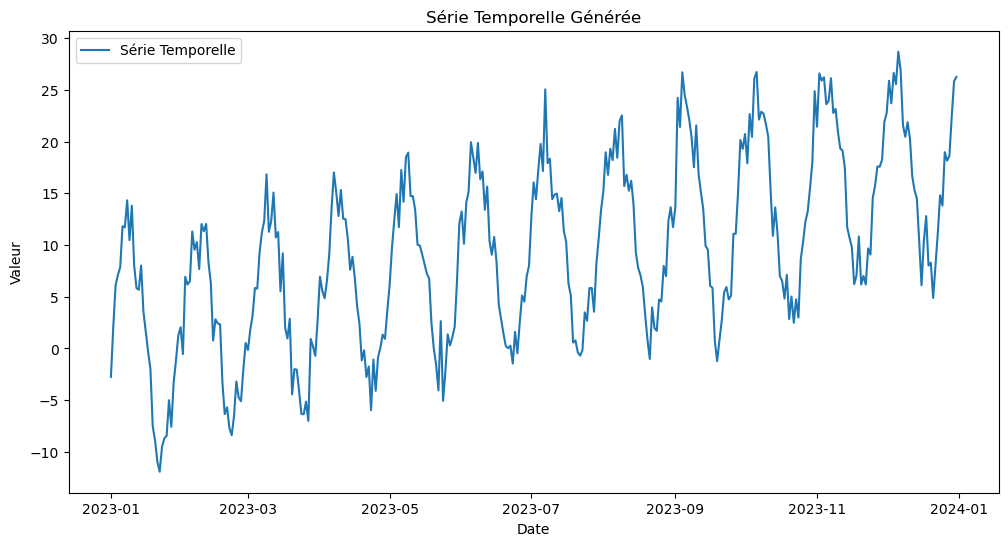

In [2]:
# Visualiser la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(serie, label='Série Temporelle')
plt.title('Série Temporelle Générée')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.show()

### Stationnarite

- Pour modeliser une serie temporelle, il faut qu'il soit stationnaire. La stationnarite fait reference une serie temporelle dont la distribution des donnees  n'evolue pas avec temps.

- Au sens mathematique fort, une serie temporelle $Y_t$ est stationnaire si $\forall$ fonction mesurable $f$, $f(Y_1,Y_2,...,Y_t)$ et $f(Y_{1+h},Y_{2+h},...,Y_{t+h})$ ont la même loi.

Cette notion de stationnarité forte est très difficile à vérifier en pratique. On lui préfère généralement la notion de stationnarité faible qui porte sur les moments d’ordre 1 et 2 du processus aleatoire.

soit un series temporelle $(Y_t)$, $t ∈ \mathbb{Z}$
 tel que $E(Y_t)<∞$
, il est dit stationnaire au sens faible (ou d’ordre 2) si son espérance est constante et ses auto-covariances sont stables dans le temps ie:
$$\forall t, E(Y_t)=μ$$
 
%$$\forall t, cov(Y_t,Y_{t+h})=γ(h)$$ . 

On remarque que pour $h = 0$ on a $\gamma(0)= cov(Y_t,Y_t)= var(Y_t)$. il faut donc que la variance soit constante.
 





- La tendance est nulle, c'est a dire qu'elle n'augmente par ou ne diminue pas ne diminue pas avec le temps.
- La valeurs moyenne soit constante. 
- La variance est constante, c'est a dire la variation moyenne par rapport a la droite $y = 0 $ est contante.
- L'autocorrelation est constante, c'est a dire que la correlation entre chaque valeur et les valeurs qui les precedent dans le temps reste contante. 

### Exemple de processus stationnaire
- Les Bruit blancs  $ε_t$: Sont des processus aleatoires pour lesquels chacune de leurs valeurs n'a aucune dependendance avec leurs voisins dans le temps,  Chaque valeur du bruit blanc n'a aucune corrélation avec les autres valeurs de la série. Les bruits blancs
 vérifiant $E(ε_t)=μ$ et $var(ε_t)=σ^2$ sont stationnaires. 
- Le processus gaussien $(Y_t)_{t∈ \mathbb{Z}}$ tel que $E(Y_t)=μ$ et $cov(Y_t,Y_{t+h})=α^{|h|}$,$(|α|<1)$
- Le processus moyenne mobile $X_t=ε_t+a_1ε_{t−1}+a_2ε_{t−2}+...+a_qε_{t−q}$
- processus autorégressif d’ordre 1:
$$Y_t=aY_{t−1}+ε_t$$


En pratique, on ne connait pas explicitement les fonctions d’auto-covariance et d’auto-corrélation. Il est donc nécessaire de les estimer en se basant sur des observations.

### Autocovariance
soit une série d’observations $(Y_t)_{t∈(1,...,n)}$ notons $\bar{Y}=\frac{1}{n}\sum_{t=1}^nY_t$, alors la fonction d’auto-covariance empirique vaut, pour tout $h ∈(0,...,n−1)$

$\hat{\gamma}(h)=\frac{1}{n−h}\sum_{t=h+1}^n(Y_t−\bar{Y})(Y_{t−h}−\bar{Y})$





In [3]:
#  code de calcul de l'auto covariance d'une serie temporelle 
def autocovariance(data, timelag):
    """estimate the auto covariance of the data."""
    mean_data  = np.mean(data.values)
    length_data = data.shape[0]

    factor_1 = data.values[:-timelag,-1]-mean_data
    factor_2 = data.values[timelag:,-1]-mean_data
    return np.sum(factor_1*factor_2)/(length_data-timelag)

# Estimation de l'auto correlation d'une serie temporelle
data = pd.read_csv('../data/AirPassengers.csv', parse_dates = True, index_col = 'Month')
print('airpassengers timeseries autocovariance', round(autocovariance(data,1),2))

airpassengers timeseries autocovariance 13644.22


#### AutoCorrelation

soit une série d’observations $(Y_t)_{t∈(1,...,n)}$ notons $\bar{Y}=\frac{1}{n}\sum_{t=1}^nY_t$, alors la fonction d’autocorrelation empirique vaut, pour tout $h ∈(0,...,n−1)$

$\hat{\rho}(h)=\frac{\frac{1}{n−h}\sum_{t=h+1}^n(Y_t−\bar{Y})(Y_{t−h}−\bar{Y})}{\frac{1}{n}(Y_t−\bar{Y})^2}$

L'autocorrelogramme est la representation graphique de la fonction d'autocorrelation. 


In [4]:
#  code du calcul d'autocorrelation d'une serie temporelle
def autocovariance(data, timelag):
    """estimate the auto covariance of the data."""
    mean_data  = np.mean(data.values)
    length_data = data.shape[0]
    num_factor_1 = data.values[:-timelag,-1]-mean_data
    num_factor_2 = data.values[timelag:,-1]-mean_data
    denominator = np.sum((data.values-mean_data)**2)/length_data
    numerator = np.sum(num_factor_1*num_factor_2)/(length_data-timelag)
    return numerator/denominator

# Estimation de l'auto correlation d'une serie temporelle
data = pd.read_csv('../data/AirPassengers.csv', parse_dates = True, index_col = 'Month')
print('airpassengers timeseries autocorrelation', round(autocovariance(data,1),2))



airpassengers timeseries autocorrelation 0.95


#### Comment verifier qu'une serie temporelle est stationnaire?

pour verifier qu'une serie temporelle est stationnaire on peut proceder comme suit: 

1 En premier lieu on observe visuellement la serie temporelle:

- Est ce que la serie possede ou pas une tendance (la  moyenne est il constante)?
- Est ce que la variance de la serie est stable dans le temps

 
2 Confirmer nos hypotheses grace aux test statistique de stationnarite,.


##### The augmented Dicky-Fuller Test (ADF)
C'est un test de detection de la presence d'une tendance dans notre serie stationnaire. 
Hypothese nulle: 'la serie statistique est noon stationnaire'

In [5]:
# Application du test ADF

from statsmodels.tsa.stattools import adfuller
result = adfuller(serie.values)
print(result)

(-1.093967643367115, 0.7174715340660336, 17, 347, {'1%': -3.449336554273722, '5%': -2.8699055166063085, '10%': -2.571226758215748}, 1591.5552969889795)


Les valeurs  importantes pour notre interpretation sont les deux premiers:
- le premier element est le test statistique: Plus cette valeur est negative, plus cette serie est probablement stationnaire.
- La deuxieme valeur est la p-valeur. si cette valeur est en dessous de $0.05$ on rejette l'hypothese nulle. Alors elle est stationnaire, sinon l'hypothese nullen'est rejette et donc la serie est non stationnaire.

D'apres les deux premieres valeurs du test precedemment effectues, notre serie n'est pas stationnaire.

### Comment rendre notre serie stationnaire

Afin de pouvoir modeliser une serie temporelle, il va falloir la rendre stationnaire. Pour ce faire on peut:
- soit differencier une ou deux fois la serie (*differentiation a l'ordre 01 et a l'ordre 02)
- soit appliquer une transformation logarithmique et/ou ensuite appliquer une differentiation.



(-13.013249708447836,
 2.541901171436183e-24,
 17,
 346,
 {'1%': -3.4493918438232525,
  '5%': -2.8699298018856574,
  '10%': -2.5712397066390458},
 1565.5362276100427)

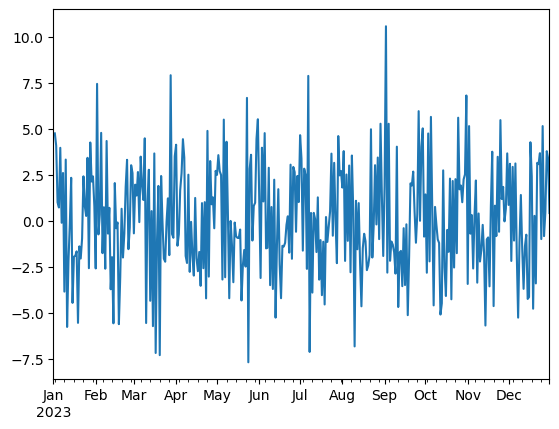

In [6]:
# Premierement on differentie et ensuite on test la stationnarite du  signal differentier

serie_diff = serie.diff()
serie_diff.plot()
test = adfuller(serie_diff.dropna())
test


D'apres les valeurs du test, la serie differentier est stationnaire. 

First test
(0.8153688792060423, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)
Second test
(-2.8292668241699874, 0.05421329028382711, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854085)


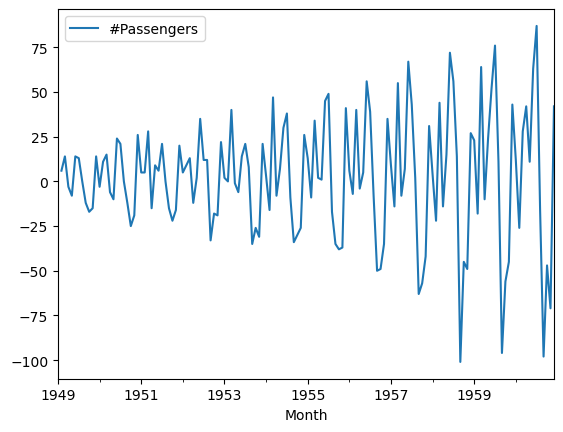

In [7]:
print('First test')
print(adfuller(data.values))
# Differentions la seconde serie.
data_diff = data.diff()
data_diff.plot()

print('Second test')
print(adfuller(data_diff.dropna().values) )

le signal differentier et le signal original ne sont pas stationnaires. On procedera alors d'une autre facon:

- Soit on differentie une deuxieme fois, 

- Soit faire une transformation avant de proceder a une differentiation.

(-8.196629132182192, 7.419304549378255e-13, 13, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, -430.893628286427)


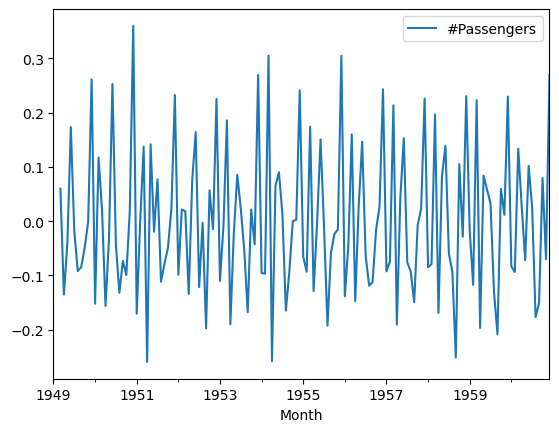

In [8]:
data_transformed = np.log(data).diff().diff()
data_transformed.plot()
print(adfuller(data_transformed.dropna()))

Le resultat du test des deux transformations revelent que celle qui est la plus adapte pour ces donnees est la deuxieme.


#### Introduction aux models AR, MA et ARMA

##### Modeles AR

Les modeles AR encore appelees modeles autoregressif, sont des modeles qui font la regression de chacune des  valeurs d'une serie temporelle en fonction des valeurs qui la precedent dans le temps. 

- Modeles AR d'ordre 1: le modele effectue ici la regression d'une valeur de la serie a l'intant t par la valeur de la meme serie  a l'intant t-1
   $ Y_t = a_1Y_{t-1}+\epsilon_t $, ou $a_1$. $a_1$ est le coefficient d'autoregression au decalage de temps de 1 (lag one) et $\epsilon_t$ represente le terme de shock ou le terme de bruit ou d'erreur par rapport au modele. On peut ici faire une analogie entre le modele AR et le modele de regression lineaire. $Y_t$ peut etre vu comme la variable dependante et $Y_{t-1}$ peut etre vue comme la variable dependante. $a_1$ etant la pente et $\epsilon$ le terme d'erreur lies au modele.
- L'ordre du modele est le nombre de decalage temporelle utiliser.On peut generaliser le modele d'ordre 1 a un ordre $p$ quelconque. $Y_t = a_1Y_{t-1}+a_2Y_{t-2}+...a_pY_{t-p}+\epsilon_t$. Cela signifie qu'on a $p$ coefficient d'autoregression et $p$ variables independantes.


#### Modeles MA 

Les modeles  MA (Moving average modeles)sont des modeles qui effectuent une regressions des valeur actuelles d'une serie temporelle par des termes d'erreurs des valeurs precedentes de la meme serie temporelle. Pour Un model MA d'ordre 1 on a $Y_t = m_1\epsilon_{t-1}+\epsilon_t$, plus generalement a l'ordre q on a $Y_t = m_1\epsilon_{t-1}+m_2\epsilon_{t-2}+...+m_q\epsilon_{t-q}+\epsilon_t$

#### Modeles ARMA
Ce sont des modeles obtenus par combinaison des modeles AR et MA 

- Un modele ARMA d'ordre $(1,1)$ est definie par: $Y_t = a_1Y_{t-1}+ m_1\epsilon_{t-1}+\epsilon_t$. Plus generalement on parlera de  modele ARMA d'ordre $p$ et $q$, p pour l'ordre de la partie AR et q pour la partie MA.

#### Comment generer des donnees d'une serie temporelle suivant un modele ARMA?

Supposons que nous voulions generer des donnees suivant le modele $Y_t = 0.5Y_{t-1}+0.2\epsilon_{t-1}+\epsilon_t$

Text(0, 0.5, 'y')

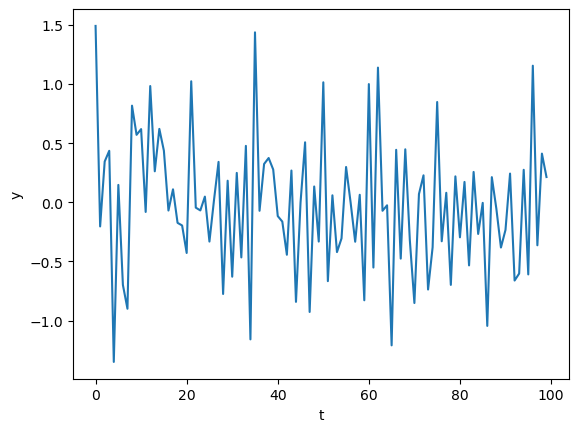

In [9]:
from statsmodels.tsa.arima_process import arma_generate_sample

ar_coef = [1,0.5] # 1 represente le coefficient pour le decalage nulle. -0.5 pour le coefficient pour le decalage de 1 de la partie AR. Les coefficients d'autoregression de la 
# partie AR prenne toujours un signe negatif.   
ma_coef = [1,0.2] # 1 represente le coefficient pour le decalage nulle. 0.2 pour le coefficient pour le decalage de 1
data = arma_generate_sample(ar_coef,ma_coef, nsample=100, scale= 0.5 )   # genere 100 donnees avec un ecart type de 0.5

plt.plot(range(data.shape[0]), data)
plt.xlabel("t")
plt.ylabel("y")



Notons que dans le modele de generation des donnees, les coefficient de la partie AR sont donnees par $[1, -a_1, -a_2, ..., -a_p]$ et ceux de la partie MA par $[1, m_1,m_2, ..., m_q]$ ou les  $a_i$ sont les coefficients AR decaler de 1 et  les $m_j$ sont les coefficients MA decaler de $j$ dans le passe  par rapport a l'instant actuel.

Maintenant on peut ajuster un modele ARIMA  sur ces donnees. Ce modele, une fois ajuster va nous permettre de faire des previsions sur les futur valeurs de la serie faisons le alors!

In [10]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order = (1,0,1))
model.fit()


Nous allons faire un exemple concret d'ajustement sur des donnees reelles:


In [11]:
df = pd.read_csv('../data/daily-total-female-births-CA.csv',parse_dates=True, index_col = 'date')
df.head(10)

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
1959-01-06,29
1959-01-07,45
1959-01-08,43
1959-01-09,38


(-4.808291253559764, 5.2434129901498554e-05, 6, 358, {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}, 2343.8290926464197)


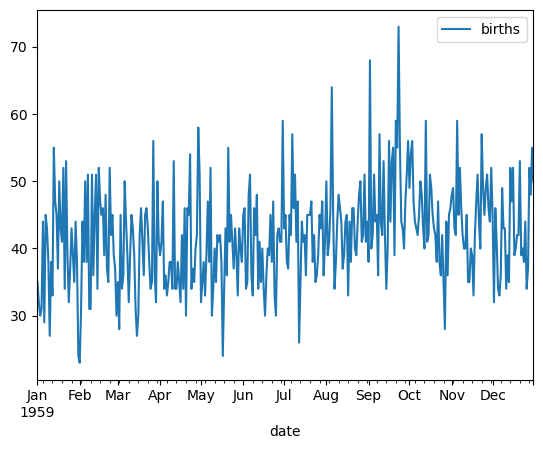

In [12]:
df.plot()
print(adfuller(df['births'].dropna()))


Cette serie est stationnaire car la pvaleur est en dessous de 0.05 et le test est assez negatif. Nous pouvons donc proceder a l'elaboration d'un modele ARMA pour faire des prevision sur ces donnees.

In [13]:
modele = ARIMA(df, order=(2,0,1))    #definition du modele
result = modele.fit()                 # ajustement du modele sur le jeu de donnees

/home/moi/anaconda3/envs/mon_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/moi/anaconda3/envs/mon_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/moi/anaconda3/envs/mon_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [14]:
# Affichage  du resume sur le modele

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                 births   No. Observations:                  365
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1228.142
Date:                Mon, 28 Oct 2024   AIC                           2466.283
Time:                        19:32:48   BIC                           2485.783
Sample:                    01-01-1959   HQIC                          2474.033
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7926      1.712     24.417      0.000      38.438      45.147
ar.L1          1.1111      0.067     16.576      0.000       0.980       1.243
ar.L2         -0.1206      0.062     -1.941      0.0

On peut aussi parler des modeles ARMAX, encore apppelees exogenous ARMA, qui sont obtenu en ajoutant une variable independante au modele ARMA de base. Definissons alors un modele ARMA(1,1) et ARMAX(1,1):

ARMA(1,1): $$Y_t = a_1Y_{t-1}+ m_1\epsilon_{t-1}+\epsilon_t$$

ARMAX(1,1): $$Y_t = X_1Z_t+ a_1Y_{t-1}+ m_1\epsilon_{t-1}+\epsilon_t$$

Maintenant passons aux previsions.

##### Prevision: One step ahead prediction

In [15]:
# Generate one step ahead predictions
forecast = result.get_prediction(start = -20)

# forecast's central value
forecast_mean = forecast.predicted_mean

# Get confidence intervalle of a forecast, lower and upper values
confidence_interval = forecast.conf_int() 

Le parametre start permet de specifier le nombre des dernieres valeurs de notre dataset nous  voulons predire. les deux derniers codes sont respectivements les previsions moyennes et les intervalles de confiances associees chaque valeur predite.

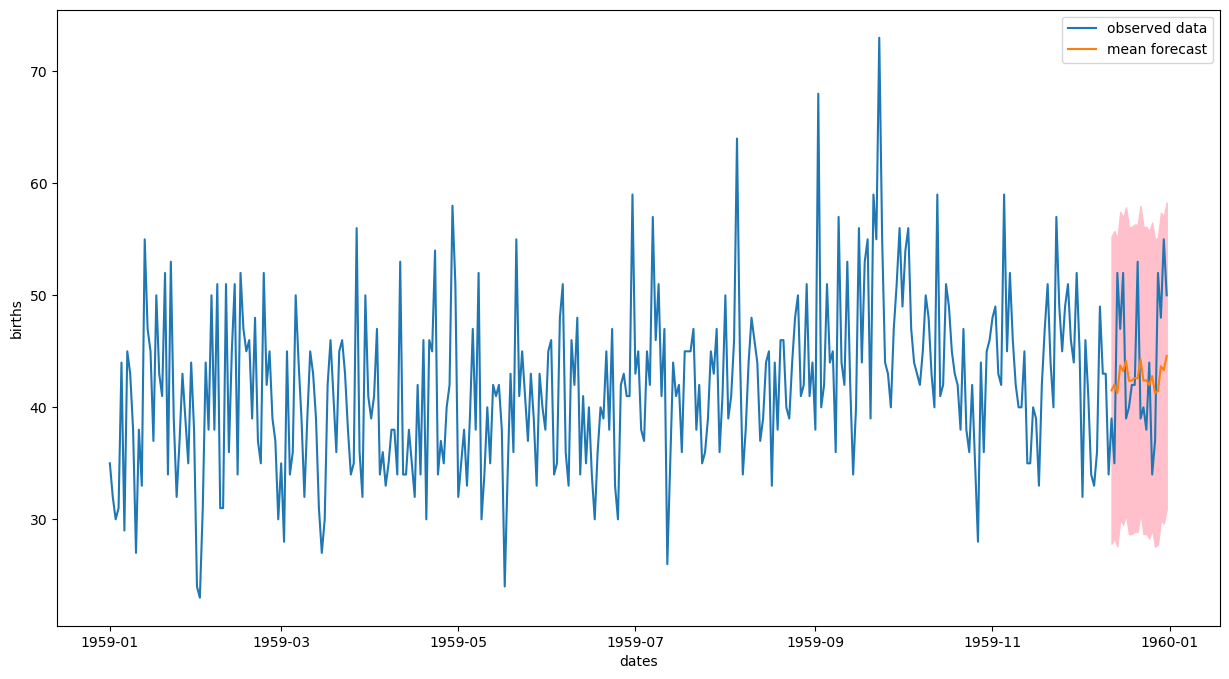

In [16]:
import matplotlib.pyplot as plt
def forecast_plotting(df,forecast_mean, confidence_interval):
    """Display the observed time series and its predictions """
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(df, label = 'observed data')
    ax.plot(forecast_mean, label = 'mean forecast')
    ax.fill_between(confidence_interval.index,confidence_interval['lower births'],confidence_interval['upper births'],color = 'pink')
    ax.set_xlabel('dates')
    ax.set_ylabel('births')
    ax.legend()


forecast_plotting(df,forecast_mean, confidence_interval)

On peut aussi faire de la prevision dynamique. la prevision dynamique est similaire a celle faite precedement. la seule difference vient de du parametre 'dynamic' de la fonction "get_prediction"

#### Dynamic prediction

In [17]:
# Generate dynamic prediction
dynamic_forecast = result.get_prediction(start = -20, dynamic=True)

Nous venons de faire des prevision dans les donnees qui ont ete fourni au modele (forecasting in the sample). Nous pouvons faire des prevision sur des dates ulterieur, qui n'ont pas ete fourni aux modele(forecasting out of the sample)

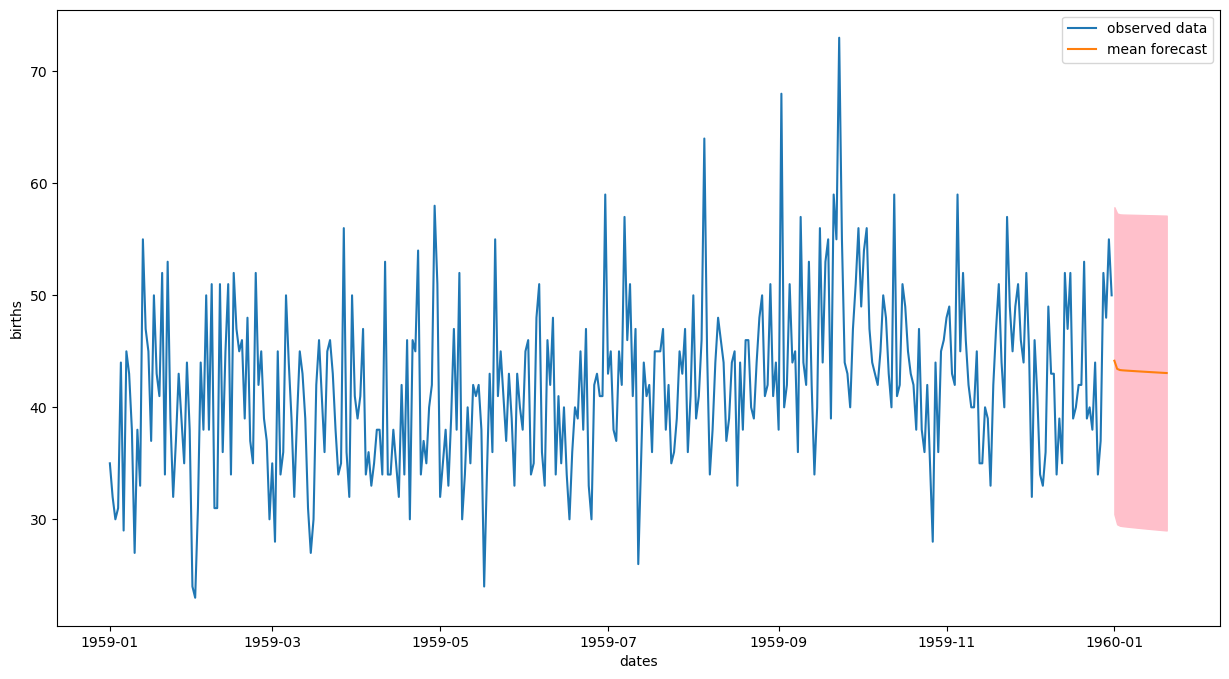

In [18]:
# forecast out of the sample
outsample_forecast = result.get_forecast(steps = 20)

# forecast's central value
forecast_mean = outsample_forecast.predicted_mean

# Get confidence intervalle of a forecast, lower and upper values
confidence_interval = outsample_forecast.conf_int() 

# Visualisation
forecast_plotting(df,forecast_mean, confidence_interval)

Maintenant passons aux model ARIMA. un modele ARIMA est generalement defini par 03 ordres: l'ordre d'auto regression p, l'ordre de differentiation d et l'ordre de moyenne mobile q. lorsque l'ordre d est nulle, on est en face d'un modele ARMA. une fois que c'est un entier positif alors on est en face d'un modele ARIMA.  

Considerons pour le coup la dataset des passagers des avions d'une compagnie aerienne:

In [19]:
df_AirPassengers = pd.read_csv('/home/moi/Programming_staffs/Machine_learning/TimeSeriesForecasting/data/AirPassengers.csv', index_col='Month',parse_dates=True)
df_AirPassengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


le graphique de cette serie est donne par:

Text(0, 0.5, 'Number of passengers')

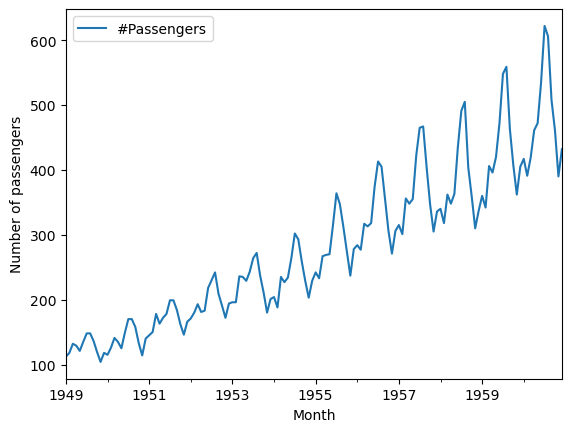

In [20]:
fig, ax = plt.subplots()
df_AirPassengers.plot(ax = ax)
ax.set_ylabel('Number of passengers')

Clairement cette serie n'est pas stationnaire puisqu'elle possede une tendance et une saisonnalite. on peut la rendre stationnaire en supprimant la tendance (avec une transformation logarithmique) et en differentiant( grace a l'ordre de differentiation d du modele ARIMA)

adfuller test: -8.196629132182192
pvalue 7.419304549378255e-13


/home/moi/anaconda3/envs/mon_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/moi/anaconda3/envs/mon_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/moi/anaconda3/envs/mon_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


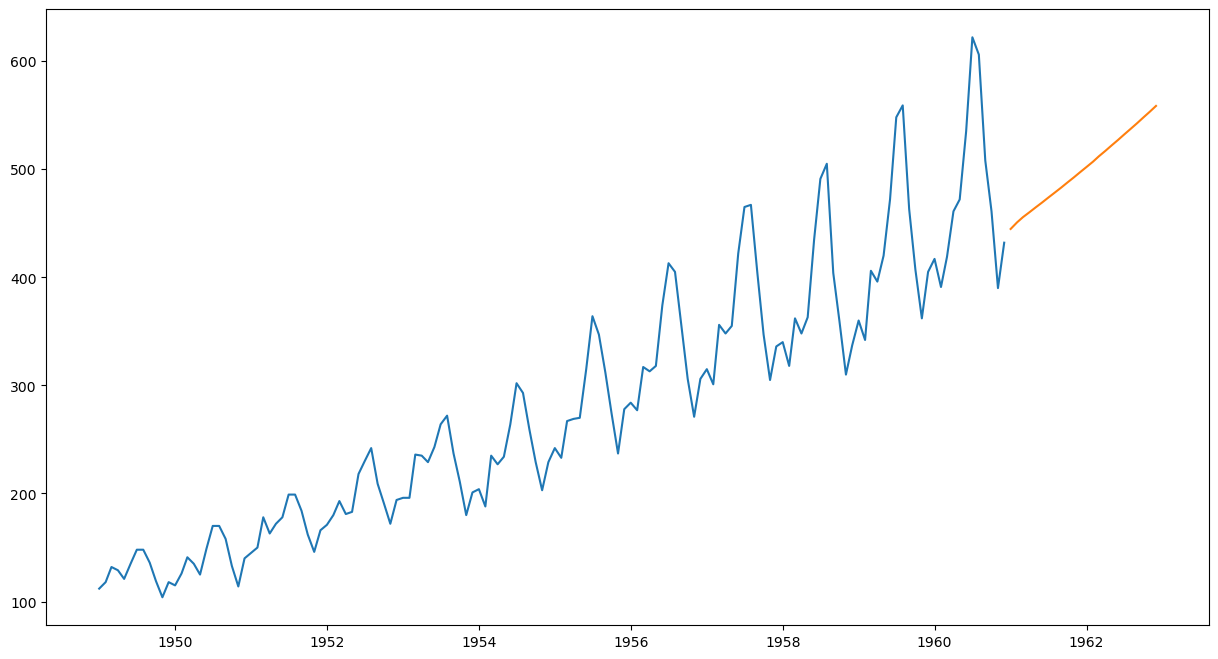

In [21]:
 # transformation des donnees 
df_AirPassengers_trans = np.log(df_AirPassengers)  

adf = adfuller(df_AirPassengers_trans['#Passengers'].diff().diff().dropna())
print('adfuller test:', adf[0])
print('pvalue', adf[1])


# definition du modele
modele = ARIMA(df_AirPassengers_trans, order = (1,2,1))  # Differentiation d'ordre 2. C

# ajustement du modele
results = modele.fit()

# Prevision sur 10 mois

forecast = results.get_forecast(steps= 24).predicted_mean

# visualizing forecast
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_AirPassengers, label = 'observed data')
ax.plot(np.exp(forecast), label = 'mean forecast')


Le test d'adfuller nous a permi de voir que l'ordre de differentiation dans notre cas est egale a 2.

#### ACF (Auto Correlation Function) et PACF (Partial Auto Correlation Function)

Maintenant on sait mettre en place un modele est l'ajuster sur nos donnees. Mais comment savons nous qu'un modele ARIMA est adapter pour notre travail? Que choisir entre ARIMA(1,1,1) et ARIMA(1,2,2)? 

Choisir le bon modele revient a choisir les bons ordres et cela se fait grace a l'etude des fonctions d'autocorelations, d'autocorrelation partielle et du test d'adfuller. 

Ah1! nous savons deja faire le test adfuller pour connaitre l'ordre de differentiation.Xe qui nous reste a faire est d'etudes des ACF et des PACF

#### ACF(AutoCorrelationFunction)

La fonctiuon d'autocorrelation d'ordre p est la correlation entre une serie et elle meme decale d'un pas p.

Exemple:

- lag-1 ACF--> $Corr(y_t,y_{t-1})$
- lag-2 ACF--> $Corr(y_t,y_{t-2})$

#### PACF(Partial AutoCorrelationFunction)



En comparant l'ACF et le PACF on peut deduire les ordres p et q du modele.

 ![Capture d’écran du 2024-10-28 20-12-42.png](<attachment:Capture d’écran du 2024-10-28 20-12-42.png>)


 
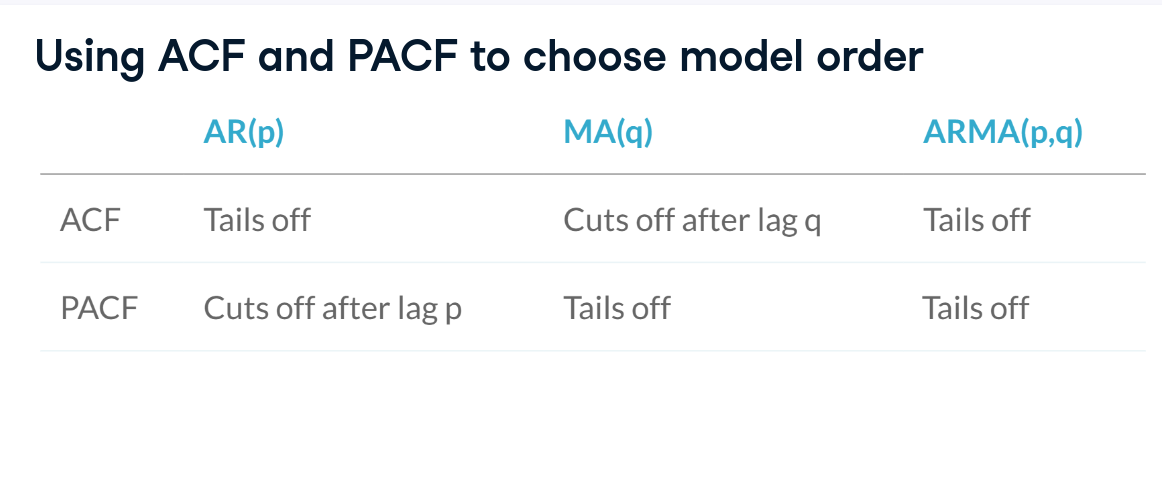

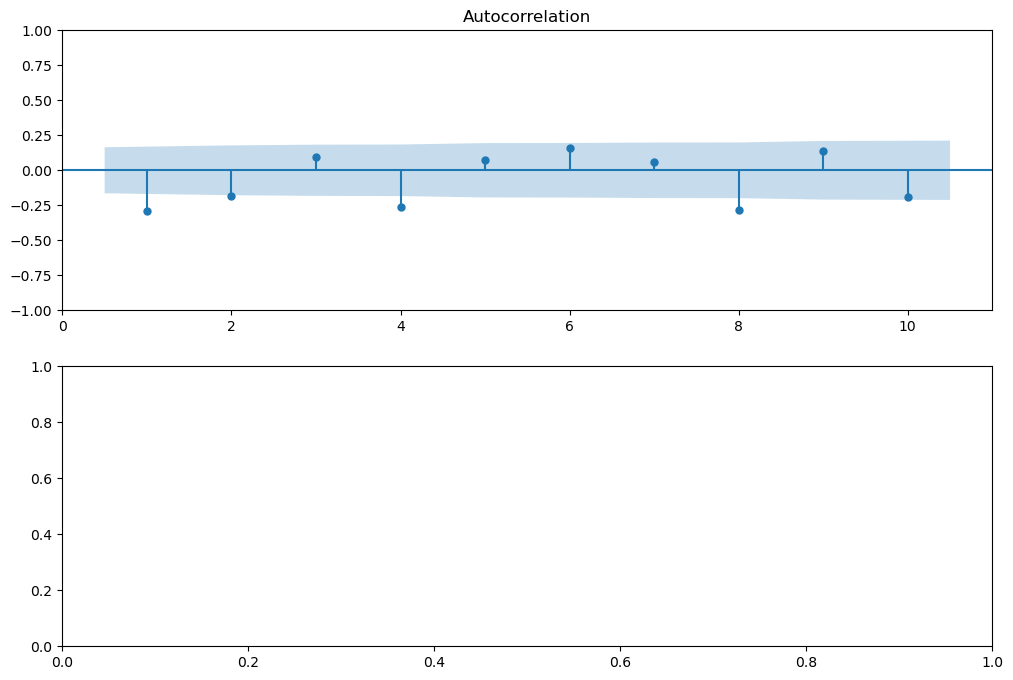

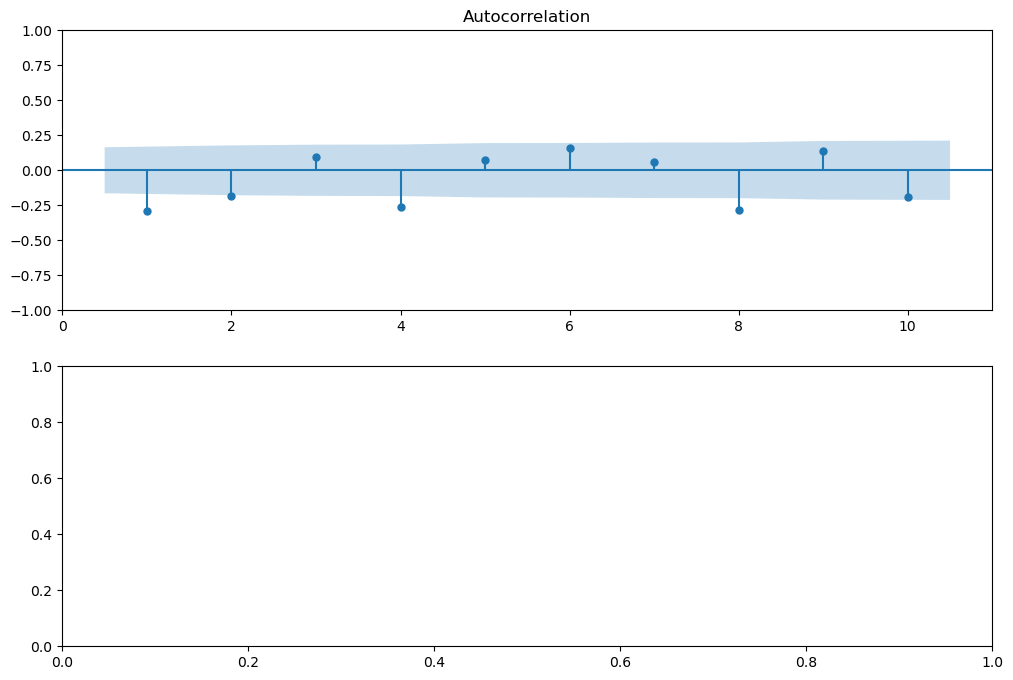

In [27]:
# representation graphique d'un ACF et d'un PACF

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig, (ax1,ax2) = plt.subplots(2,1,figsize = (12,8))
df_trans = df_AirPassengers_trans.diff().diff().dropna()   # la serie temporelle doit etre stationnaire avant de faire ces plots

plot_acf(df_trans, lags = 10,zero=False,ax=ax1)
plot_pacf(df_trans, lags = 10,zero=False,ax=ax2)